In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/vgames2.csv')
data

In [ ]:
# 1.지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다. > 지역으로 나누고
# 2.연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다. > 연도별 장르에따라 나눠야한다
# 3.출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다. > 출고량을 기준으로 표만들기

In [ ]:
import pandas as pd
import numpy as np

# 첫열삭제 , 결측치제거
df = pd.DataFrame(data)
df = data.drop(['Unnamed: 0'], axis=1)

df1 = df.dropna()

# K,M 들어간 열삭제(문자가있으면 정수전환이안되서 오름차순사용불가능)
df1 = df1[~df1.NA_Sales	.str.contains("K")]
df1 = df1[~df1.EU_Sales	.str.contains("K")]
df1 = df1[~df1.JP_Sales	.str.contains("K")]
df1 = df1[~df1.Other_Sales	.str.contains("K")]

df1 = df1[~df1.NA_Sales	.str.contains("M")]
df1 = df1[~df1.EU_Sales	.str.contains("M")]
df1 = df1[~df1.JP_Sales	.str.contains("M")]
df1 = df1[~df1.Other_Sales	.str.contains("M")]

#  판매량 정수로변환
df1[['NA_Sales', 'EU_Sales','JP_Sales','Other_Sales']] = df1[['NA_Sales', 'EU_Sales','JP_Sales','Other_Sales']].apply(pd.to_numeric)
df1

In [ ]:
print(df1.sum())

Sales = pd.DataFrame({'NA_Sales': [4080.71],
                    'EU_Sales': [2265.25],
                    'JP_Sales': [1204.19],
                    'Other_Sales': [748.17]})

Sales['전체판매량'] = (4080.71+2265.25+1204.19+748.17)
Sales

# 지역별 점유율
# 북미 49.2   유럽 27.3   일본 14.5   그외 9 (소수점 첫번째자리에서 반올림한값)

In [ ]:
# 지역별 판매량 오름차순으로 정렬
head1 = df1.sort_values('NA_Sales', ascending=False)
head2 = df1.sort_values('EU_Sales', ascending=False)
head3 = df1.sort_values('JP_Sales', ascending=False)
head4 = df1.sort_values('Other_Sales', ascending=False)
# 북미(49.2%)
head1.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46
4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77
10488,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47
1203,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58
12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96
4343,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67
16531,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26
3014,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85
13111,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55


In [ ]:
# 유럽(27.3%)
head2.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46
12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96
11137,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75
3483,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14
13229,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,Nintendo,4.75,9.26,4.16,2.05
6937,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90
3014,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85
7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00
10899,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79


In [ ]:
# 일본(14.5%)
head3.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00
9416,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71
4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77
6937,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90
10555,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37
10621,Pokemon Black/Pokemon White,DS,10.0,Role-Playing,Nintendo,5.57,3.28,5.65,0.82
10917,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,Nintendo,6.06,3.90,5.38,0.50
3273,Animal Crossing: Wild World,DS,2005.0,Simulation,Nintendo,2.55,3.52,5.33,0.88
511,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Puzzle,Nintendo,3.44,5.36,5.32,1.18
1847,Monster Hunter Freedom 3,PSP,2010.0,Role-Playing,Capcom,0.00,0.00,4.87,0.00


In [ ]:
# 그외 (9%)
head4.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
14669,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46
14665,Gran Turismo 4,PS2,2004.0,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53
3483,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14
12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96
8213,Pro Evolution Soccer 2008,PS2,2007.0,Sports,Konami Digital Entertainment,0.05,0.00,0.64,2.93
6937,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90
3014,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85
11137,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75


In [ ]:
# 연도별로 내림차순정렬 
years = df1.sort_values('Year', ascending=False)

# 100년이하 데이터는 삭제
df2 = years[years.Year>100]
df2

In [ ]:
# 연도 장르별로 표만들기 
df3 = pd.crosstab(df2.Year, df2.Genre, margins=True)
# 마지막행(합계) 제거안하면 그래프 이상해짐
df4 = df3.drop(['All'])
df4

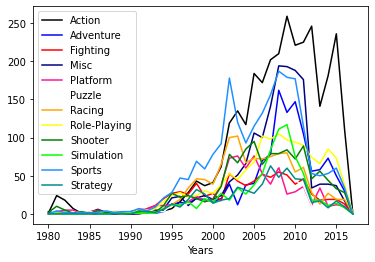

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# 연도와 장르로 그래프만들기

x = list(range(1980,2018))
y = df4.loc[:,'Action']
y1= df4.loc[:,'Adventure']
y2= df4.loc[:,'Fighting']
y3= df4.loc[:,'Misc']
y4= df4.loc[:,'Platform']
y5= df4.loc[:,'Puzzle']
y6= df4.loc[:,'Racing']
y7= df4.loc[:,'Role-Playing']
y8= df4.loc[:,'Shooter']
y9= df4.loc[:,'Simulation']
y10= df4.loc[:,'Sports']
y11= df4.loc[:,'Strategy']


plt.plot(x,y,'-', c='black',label='Action')
plt.plot(x,y1,'-', c='blue',label='Adventure')
plt.plot(x,y2,'-', c='red',label='Fighting')
plt.plot(x,y3,'-', c='navy',label='Misc')
plt.plot(x,y4,'-', c='deeppink',label='Platform')
plt.plot(x,y5,'-', c='white',label='Puzzle')
plt.plot(x,y6,'-', c='orange',label='Racing')
plt.plot(x,y7,'-', c='yellow',label='Role-Playing')
plt.plot(x,y8,'-', c='green',label='Shooter')
plt.plot(x,y9,'-', c='lime',label='Simulation')
plt.plot(x,y10,'-', c='dodgerblue',label='Sports')
plt.plot(x,y11,'-', c='darkcyan',label='Strategy')

plt.xlabel('Years')
plt.legend(loc='upper left')
plt.show()

In [ ]:
df5 = df2.drop(['Year'], axis=1)

Sales_sum = df5.sum(axis=1)
df5['Sales_sum'] = Sales_sum

df6 = pd.merge(df5,df2, how='outer')


df7 = df6.sort_values('Sales_sum', ascending=False)
df7.head(10)

In [ ]:
df8 = df7[['Name','Sales_sum']]
df8

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


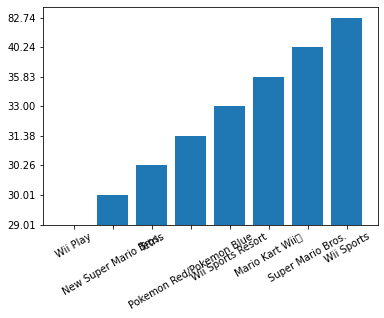

In [ ]:
from matplotlib import pyplot as plt
days_in_year = ['29.01','30.01','30.26','31.38','33.00','35.83','40.24','82.74']
plt.bar(range(len(days_in_year)), days_in_year)


ax = plt.subplot()
ax.set_xticks([0, 1, 2, 3, 4, 5 ,6 ,7])
ax.set_xticklabels(['Wii Play','New Super Mario Bros.','Tetris',
                    'Pokemon Red/Pokemon Blue','Wii Sports Resort','Mario Kart Wii	','Super Mario Bros.',
                    'Wii Sports'], rotation=30)

plt.show()

In [249]:
df7.head(10)

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum,Year
8882,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2006.0
15261,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1985.0
6489,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,2008.0
5766,Wii Sports Resort,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2009.0
14612,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,1996.0
15186,Tetris,GB,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,1989.0
9390,New Super Mario Bros.,DS,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,2006.0
9147,Wii Play,Wii,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01,2006.0
5292,New Super Mario Bros. Wii,Wii,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61,2009.0
15267,Duck Hunt,NES,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,1984.0
